In [1]:
import numpy as np
import pandas as pd
import os, fnmatch
import pickle as pkl
import seaborn as sns
from matplotlib import pyplot as plt
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [2]:
with open(r"..\data\audio_features_df_{mid_window_5,mid_step_0.5,short_window_1,short_step_0.5}.pkl", "rb") as handle:
    audio_df = pkl.load(handle)

In [3]:
with open(r"..\data\video_features_df_{ftlist_[lbps,hogs,colors,flow],width_300,step_3}.pkl", "rb") as handle:
    video_df = pkl.load(handle)

In [4]:
with open(r"..\data\metadata_df.pkl", "rb") as handle:
    metadata_df = pkl.load(handle)

In [5]:
audio_df.head()

,zcr_mean,energy_mean,energy_entropy_mean,spectral_centroid_mean,spectral_spread_mean,spectral_entropy_mean,spectral_flux_mean,spectral_rolloff_mean,mfcc_1_mean,mfcc_2_mean,...,chroma_6_std,chroma_7_std,chroma_8_std,chroma_9_std,chroma_10_std,chroma_11_std,chroma_12_std,chroma_std_std,beat,beat_conf
ae0f28579c171af7f96329028067f47d,0.015659,0.034489,3.240086,0.064995,0.121124,0.022010,0.001137,0.018974,-21.466466,2.442784,...,0.000200,0.000210,0.000141,0.000255,0.000078,0.000263,0.000085,0.000253,40.0,1.000000
1912b4269870fab4e42977c9a6fa0e1d,0.021109,0.043676,3.221657,0.064414,0.104460,0.048112,0.000969,0.024994,-20.077558,2.135254,...,0.000167,0.000145,0.000349,0.000464,0.000148,0.000458,0.000039,0.000130,40.0,0.500000
bf6632523e0215bd7b38fcc82c0a0eb9,0.022551,0.007368,3.190725,0.071015,0.117302,0.060739,0.000862,0.032717,-22.500657,2.269907,...,0.000607,0.000716,0.000750,0.000495,0.000282,0.000179,0.000426,0.000308,30.0,0.600000
39ab645473a39401775a17022cfa5d83,0.067876,0.061196,3.138526,0.154880,0.163635,0.771958,0.000129,0.133745,-17.349426,1.591118,...,0.001867,0.001436,0.001352,0.001212,0.001135,0.000789,0.001302,0.000504,40.0,0.714286
408774c62bb613bf5b570881ac010d6c,0.070744,0.042589,2.807799,0.152322,0.155079,0.839892,0.000180,0.149382,-18.951521,1.264199,...,0.001441,0.001459,0.000765,0.001109,0.001504,0.000691,0.001131,0.000494,30.0,0.714286


In [6]:
video_df.head()

,Color-R0,Color-R1,Color-R2,Color-R3,Color-R4,Color-R5,Color-R6,Color-R7,Color-R8,Color-R9,...,HOG120_std,HOG121_std,HOG122_std,HOG123_std,HOG124_std,HOG125_std,HOG126_std,HOG127_std,m_std,s_std
ae0f28579c171af7f96329028067f47d,0.326264,0.039513,0.040702,0.042950,0.035928,0.033745,0.034830,0.037670,0.050301,0.060397,...,0.103416,0.128466,0.115318,0.095118,0.094077,0.100081,0.112368,0.110038,119.433013,34.317216
1912b4269870fab4e42977c9a6fa0e1d,0.342415,0.049882,0.045782,0.044404,0.040609,0.039986,0.041479,0.039918,0.036419,0.038205,...,0.123577,0.123412,0.096190,0.091013,0.091013,0.156492,0.072838,0.141715,134.915793,29.785949
bf6632523e0215bd7b38fcc82c0a0eb9,0.294094,0.031871,0.037134,0.041713,0.039760,0.043438,0.039848,0.039414,0.042812,0.055765,...,0.120815,0.058387,0.039146,0.136455,0.096286,0.159057,0.146745,0.186624,163.033178,30.695859
39ab645473a39401775a17022cfa5d83,0.110472,0.475953,0.049553,0.031704,0.028250,0.036952,0.055507,0.069217,0.060089,0.030737,...,0.158014,0.139678,0.119862,0.095470,0.090075,0.124742,0.126096,0.127873,81.827334,29.333478
408774c62bb613bf5b570881ac010d6c,0.126516,0.483164,0.057458,0.041873,0.034512,0.040495,0.039007,0.030197,0.036785,0.031602,...,0.128297,0.124423,0.119204,0.127331,0.111944,0.156865,0.166802,0.093638,199.550882,37.455205


In [7]:
metadata_df.head()

,Title,Url,Video file path,Audio file path
ae0f28579c171af7f96329028067f47d,_He_Doesn_t_Say_It_-_Leonidas_Farewells_Queen_...,https://www.youtube.com/watch?v=7tH1FzD1YY8&fe...,data\downloads\parsed\video\_He_Doesn_t_Say_It...,data\downloads\parsed\audio\_He_Doesn_t_Say_It...
1912b4269870fab4e42977c9a6fa0e1d,_He_Doesn_t_Say_It_-_Leonidas_Farewells_Queen_...,https://www.youtube.com/watch?v=7tH1FzD1YY8&fe...,data\downloads\parsed\video\_He_Doesn_t_Say_It...,data\downloads\parsed\audio\_He_Doesn_t_Say_It...
bf6632523e0215bd7b38fcc82c0a0eb9,_He_Doesn_t_Say_It_-_Leonidas_Farewells_Queen_...,https://www.youtube.com/watch?v=7tH1FzD1YY8&fe...,data\downloads\parsed\video\_He_Doesn_t_Say_It...,data\downloads\parsed\audio\_He_Doesn_t_Say_It...
39ab645473a39401775a17022cfa5d83,title_Spartans_Part_II_Astenios_Death-id_5okHk...,https://www.youtube.com/watch?v=5okHkftNTqM,data\downloads\parsed\video\title_Spartans_Par...,data\downloads\parsed\audio\title_Spartans_Par...
408774c62bb613bf5b570881ac010d6c,title_Spartans_Part_II_Astenios_Death-id_5okHk...,https://www.youtube.com/watch?v=5okHkftNTqM,data\downloads\parsed\video\title_Spartans_Par...,data\downloads\parsed\audio\title_Spartans_Par...


In [8]:
metadata_df = metadata_df[['Title']]

# Quantize the features

In [9]:
# Preprocess each feature dataframe to encode in one-hot-vectors
audio_1h = pd.DataFrame(index=audio_df.index)
video_1h = pd.DataFrame(index=video_df.index)

for col in audio_df.columns:
    abin = pd.cut(x=audio_df[col],
                  bins=4, 
                  labels=['__low','__mid_low','__mid_high', '__high'], 
                  retbins=False)
    onehot = pd.get_dummies(abin,prefix=col)
    audio_1h = audio_1h.join(onehot)


for col in video_df.columns:
    abin = pd.cut(x=video_df[col],
                  bins=4, 
                  labels=['__low','__mid_low','__mid_high', '__high'], 
                  retbins=False)
    onehot = pd.get_dummies(abin,prefix=col)
    video_1h = video_1h.join(onehot)

In [10]:
audio_1h.head()

,zcr_mean___low,zcr_mean___mid_low,zcr_mean___mid_high,zcr_mean___high,energy_mean___low,energy_mean___mid_low,energy_mean___mid_high,energy_mean___high,energy_entropy_mean___low,energy_entropy_mean___mid_low,...,chroma_std_std___mid_high,chroma_std_std___high,beat___low,beat___mid_low,beat___mid_high,beat___high,beat_conf___low,beat_conf___mid_low,beat_conf___mid_high,beat_conf___high
ae0f28579c171af7f96329028067f47d,1,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1912b4269870fab4e42977c9a6fa0e1d,1,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
bf6632523e0215bd7b38fcc82c0a0eb9,1,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
39ab645473a39401775a17022cfa5d83,0,1,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
408774c62bb613bf5b570881ac010d6c,0,1,0,0,1,0,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0


In [11]:
video_1h.head()

,Color-R0___low,Color-R0___mid_low,Color-R0___mid_high,Color-R0___high,Color-R1___low,Color-R1___mid_low,Color-R1___mid_high,Color-R1___high,Color-R2___low,Color-R2___mid_low,...,HOG127_std___mid_high,HOG127_std___high,m_std___low,m_std___mid_low,m_std___mid_high,m_std___high,s_std___low,s_std___mid_low,s_std___mid_high,s_std___high
ae0f28579c171af7f96329028067f47d,0,1,0,0,1,0,0,0,1,0,...,0,0,0,1,0,0,0,1,0,0
1912b4269870fab4e42977c9a6fa0e1d,0,1,0,0,1,0,0,0,1,0,...,1,0,0,0,1,0,0,1,0,0
bf6632523e0215bd7b38fcc82c0a0eb9,0,1,0,0,1,0,0,0,1,0,...,0,1,0,0,1,0,0,1,0,0
39ab645473a39401775a17022cfa5d83,1,0,0,0,0,0,1,0,1,0,...,1,0,0,1,0,0,0,1,0,0
408774c62bb613bf5b570881ac010d6c,1,0,0,0,0,0,1,0,1,0,...,0,0,0,0,0,1,0,0,1,0


# Initial loop to figure out feature subsets

Do not run, unless you know what you are doing. Expected wall time 22h.

In [13]:
%%time 
t_results = []
for col in video_1h.columns[2536:]:
    print('Starting to examine ', col)
    tester_df = pd.DataFrame(index=audio_1h.index)
    tester_df = audio_1h.join(video_1h[col])
    frequent_itemsets = apriori(tester_df, min_support=0.85, use_colnames=True)
    frequent_itemsets['freq_list'] = [list(i) for i in frequent_itemsets['itemsets']]
    results = [itemset for itemset in frequent_itemsets['freq_list'] if col in itemset]
    t_results.append(results)
    if len(results) > 0:
        print('something\'s here!')
    else:
        print('no results found!')
    #f_rules = association_rules(frequent_itemsets, metric="lift", min_threshold=2)
    #print(f_rules)

Starting to examine  HOG56_std___low
no results found!
Starting to examine  HOG56_std___mid_low
no results found!
Starting to examine  HOG56_std___mid_high
no results found!
Starting to examine  HOG56_std___high
no results found!
Starting to examine  HOG57_std___low
no results found!
Starting to examine  HOG57_std___mid_low
no results found!
Starting to examine  HOG57_std___mid_high
no results found!
Starting to examine  HOG57_std___high
no results found!
Starting to examine  HOG58_std___low
no results found!
Starting to examine  HOG58_std___mid_low
no results found!
Starting to examine  HOG58_std___mid_high
no results found!
Starting to examine  HOG58_std___high
no results found!
Starting to examine  HOG59_std___low
no results found!
Starting to examine  HOG59_std___mid_low
no results found!
Starting to examine  HOG59_std___mid_high
no results found!
Starting to examine  HOG59_std___high
no results found!
Starting to examine  HOG60_std___low
no results found!
Starting to examine  HOG6

no results found!
Starting to examine  HOG91_std___high
no results found!
Starting to examine  HOG92_std___low
no results found!
Starting to examine  HOG92_std___mid_low
no results found!
Starting to examine  HOG92_std___mid_high
no results found!
Starting to examine  HOG92_std___high
no results found!
Starting to examine  HOG93_std___low
no results found!
Starting to examine  HOG93_std___mid_low
no results found!
Starting to examine  HOG93_std___mid_high
no results found!
Starting to examine  HOG93_std___high
no results found!
Starting to examine  HOG94_std___low
no results found!
Starting to examine  HOG94_std___mid_low
no results found!
Starting to examine  HOG94_std___mid_high
no results found!
Starting to examine  HOG94_std___high
no results found!
Starting to examine  HOG95_std___low
no results found!
Starting to examine  HOG95_std___mid_low
no results found!
Starting to examine  HOG95_std___mid_high
no results found!
Starting to examine  HOG95_std___high
no results found!
Starti

no results found!
Starting to examine  HOG127_std___low
no results found!
Starting to examine  HOG127_std___mid_low
no results found!
Starting to examine  HOG127_std___mid_high
no results found!
Starting to examine  HOG127_std___high
no results found!
Starting to examine  m_std___low
no results found!
Starting to examine  m_std___mid_low
no results found!
Starting to examine  m_std___mid_high
no results found!
Starting to examine  m_std___high
no results found!
Starting to examine  s_std___low
no results found!
Starting to examine  s_std___mid_low
no results found!
Starting to examine  s_std___mid_high
no results found!
Starting to examine  s_std___high
no results found!
Wall time: 2h 14min 47s


In [12]:
video_1h.columns.get_loc('HOG56_std___low')

2536

# Feature downsampling according to exploratory run

In [12]:
with open('findings1.txt') as text:
    findings = text.read()

In [13]:
import re

In [14]:
regx = re.compile(".*\nsomething\'s here!")
interesting = re.findall(regx,findings)
att = []
for match in interesting:
    m = re.split('Starting to examine  |\nsomething\'s here!',match)
    att.append(m[1])

In [15]:
att

['Color-R1___low',
 'Color-R2___low',
 'Color-R8___low',
 'Color-R9___low',
 'Color-R10___low',
 'Color-R11___low',
 'Color-R12___low',
 'Color-R13___low',
 'Color-R14___low',
 'Color-R15___low',
 'Color-G1___low',
 'Color-G4___low',
 'Color-G5___low',
 'Color-G6___low',
 'Color-G7___low',
 'Color-G8___low',
 'Color-G9___low',
 'Color-G10___low',
 'Color-G11___low',
 'Color-G12___low',
 'Color-G13___low',
 'Color-G14___low',
 'Color-G15___low',
 'Color-B1___low',
 'Color-B6___low',
 'Color-B7___low',
 'Color-B8___low',
 'Color-B9___low',
 'Color-B10___low',
 'Color-B11___low',
 'Color-B12___low',
 'Color-B13___low',
 'Color-B14___low',
 'Color-B15___low',
 'Color-Gray1___low',
 'Color-Gray6___low',
 'Color-Gray7___low',
 'Color-Gray8___low',
 'Color-Gray9___low',
 'Color-Gray10___low',
 'Color-Gray11___low',
 'Color-Gray12___low',
 'Color-Gray13___low',
 'Color-Gray14___low',
 'Color-Gray15___low',
 'Color-GraySobel10___low',
 'Color-GraySobel11___low',
 'Color-GraySobel12___low',
 'Co

In [16]:
len(att)

145

In [17]:
video_interesting = video_1h[att]

In [18]:
video_interesting

,Color-R1___low,Color-R2___low,Color-R8___low,Color-R9___low,Color-R10___low,Color-R11___low,Color-R12___low,Color-R13___low,Color-R14___low,Color-R15___low,...,LBP21_std___low,LBP42_std___low,LBP66_std___low,LBP69_std___low,LBP74_std___low,LBP77_std___low,LBP82_std___low,LBP106_std___low,LBP109_std___low,LBP125_std___low
ae0f28579c171af7f96329028067f47d,1,1,1,1,1,1,0,0,0,1,...,1,1,1,0,1,0,1,1,1,0
1912b4269870fab4e42977c9a6fa0e1d,1,1,1,1,1,1,0,0,0,1,...,1,1,1,1,1,1,0,1,1,1
bf6632523e0215bd7b38fcc82c0a0eb9,1,1,1,1,1,1,0,0,0,1,...,1,1,1,1,1,1,0,1,1,1
39ab645473a39401775a17022cfa5d83,0,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
408774c62bb613bf5b570881ac010d6c,0,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
c84f025cdee3b1769505ce0fa0e8b512,1,1,1,1,1,1,1,1,1,1,...,1,1,0,1,0,1,1,1,1,1
5cd622f5d6d9513579d219546f25f9d2,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
8de7e5c19c79236ed00c0aeec08c916c,1,1,1,1,1,1,1,1,1,1,...,1,1,0,1,1,1,1,1,1,1
c028f8189f0e082f76c798a8eca254ca,1,1,1,0,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,0,0


In [19]:
df = audio_1h.join(video_interesting)

In [20]:
df

,zcr_mean___low,zcr_mean___mid_low,zcr_mean___mid_high,zcr_mean___high,energy_mean___low,energy_mean___mid_low,energy_mean___mid_high,energy_mean___high,energy_entropy_mean___low,energy_entropy_mean___mid_low,...,LBP21_std___low,LBP42_std___low,LBP66_std___low,LBP69_std___low,LBP74_std___low,LBP77_std___low,LBP82_std___low,LBP106_std___low,LBP109_std___low,LBP125_std___low
ae0f28579c171af7f96329028067f47d,1,0,0,0,1,0,0,0,0,0,...,1,1,1,0,1,0,1,1,1,0
1912b4269870fab4e42977c9a6fa0e1d,1,0,0,0,1,0,0,0,0,0,...,1,1,1,1,1,1,0,1,1,1
bf6632523e0215bd7b38fcc82c0a0eb9,1,0,0,0,1,0,0,0,0,0,...,1,1,1,1,1,1,0,1,1,1
39ab645473a39401775a17022cfa5d83,0,1,0,0,0,1,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
408774c62bb613bf5b570881ac010d6c,0,1,0,0,1,0,0,0,0,1,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
c84f025cdee3b1769505ce0fa0e8b512,1,0,0,0,0,1,0,0,0,0,...,1,1,0,1,0,1,1,1,1,1
5cd622f5d6d9513579d219546f25f9d2,1,0,0,0,1,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
8de7e5c19c79236ed00c0aeec08c916c,1,0,0,0,1,0,0,0,0,0,...,1,1,0,1,1,1,1,1,1,1
c028f8189f0e082f76c798a8eca254ca,0,1,0,0,1,0,0,0,0,0,...,1,1,1,1,1,1,1,1,0,0


# Frequent Itemsets & Rule mining

In [21]:
%%time
frequent_itemsets = apriori(df, min_support=0.95, verbose=1)

Processing 34 combinations | Sampling itemset size 17161532
Wall time: 24min 20s


In [27]:
%%time
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.5)
rules.head()

Wall time: 1h 50min 25s


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction


In [ ]:
%%time
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.7)
rules.head()

In [ ]:
rules.to_csv('itemsets.csv')

In [ ]:
frequent_itemsets.to_csv('fi.csv')

# No Further please

In [29]:
col = 'zcr_mean___low'

print('Starting to examine ', col)
tester_df = pd.DataFrame(index=video_1h.index)
tester_df = video_1h.join(audio_1h[col])
frequent_itemsets = apriori(tester_df, min_support=0.85, use_colnames=True)
results = len(frequent_itemsets.loc[frequent_itemsets['itemsets'].str.contains(col).notna()])
if results > 0:
    print(frequent_itemsets.loc[frequent_itemsets['itemsets'].str.contains(col).notna()])
else:
    print('no results found!')



Starting to examine  zcr_mean___low


MemoryError: Unable to allocate 325. GiB for an array with shape (87216790, 5, 800) and data type uint8

In [ ]:
%%time 
#rules = pd.DataFrame()
for col in audio_1h.columns:
    print('Starting to examine ', col)
    tester_df = pd.DataFrame(index=video_1h.index)
    tester_df = video_1h.join(audio_1h[col])
    frequent_itemsets = apriori(tester_df, min_support=0.85, use_colnames=True)
    results = len(frequent_itemsets.loc[frequent_itemsets['itemsets'].str.contains(col).notna()])
    if results > 0:
        print(frequent_itemsets.loc[frequent_itemsets['itemsets'].str.contains(col).notna()])
        break
    else:
        print('no results found!')
        continue
    #f_rules = association_rules(frequent_itemsets, metric="lift", min_threshold=2)
    #print(f_rules)

# Legacy stuff

In [12]:
df = metadata_df.join(audio_df)

In [7]:
df = df.join(video_df)

In [11]:
df.describe()

,zcr_mean,energy_mean,energy_entropy_mean,spectral_centroid_mean,spectral_spread_mean,spectral_entropy_mean,spectral_flux_mean,spectral_rolloff_mean,mfcc_1_mean,mfcc_2_mean,...,HOG120_std,HOG121_std,HOG122_std,HOG123_std,HOG124_std,HOG125_std,HOG126_std,HOG127_std,m_std,s_std
count,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,...,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,0.045433,0.032463,3.137316,0.105417,0.131526,0.331383,0.000528,0.064122,-19.660575,1.860675,...,0.084554,0.086473,0.079145,0.098172,0.080729,0.090061,0.079583,0.099495,125.802545,33.648423
std,0.020241,0.021510,0.121145,0.035070,0.028112,0.244724,0.000504,0.037480,1.549289,0.757877,...,0.048172,0.036795,0.038422,0.051380,0.051747,0.041128,0.040628,0.047969,30.451779,7.675505
min,0.008985,0.001157,2.574424,0.033924,0.074668,0.001099,0.000000,0.005180,-25.419699,-0.907483,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.030639,0.020455,3.080003,0.080453,0.110864,0.144767,0.000202,0.036313,-20.620327,1.410644,...,0.044526,0.060916,0.050826,0.063259,0.040799,0.060601,0.047649,0.059127,107.752150,29.442338
50%,0.043652,0.029300,3.166834,0.105168,0.130678,0.300242,0.000328,0.057376,-19.398114,1.797928,...,0.081127,0.085081,0.077474,0.096309,0.073541,0.092169,0.077649,0.103332,124.095671,33.499285
75%,0.058191,0.039000,3.223315,0.126290,0.147399,0.463766,0.000668,0.083350,-18.523487,2.242630,...,0.121170,0.112790,0.105522,0.127790,0.110100,0.118796,0.109613,0.135977,142.410758,37.988106
max,0.167614,0.187188,3.313892,0.250449,0.233052,1.550149,0.003096,0.255448,-15.927440,5.053347,...,0.239958,0.189658,0.197472,0.343886,0.337429,0.211000,0.196049,0.242329,243.947134,69.011563


KeyboardInterrupt: 

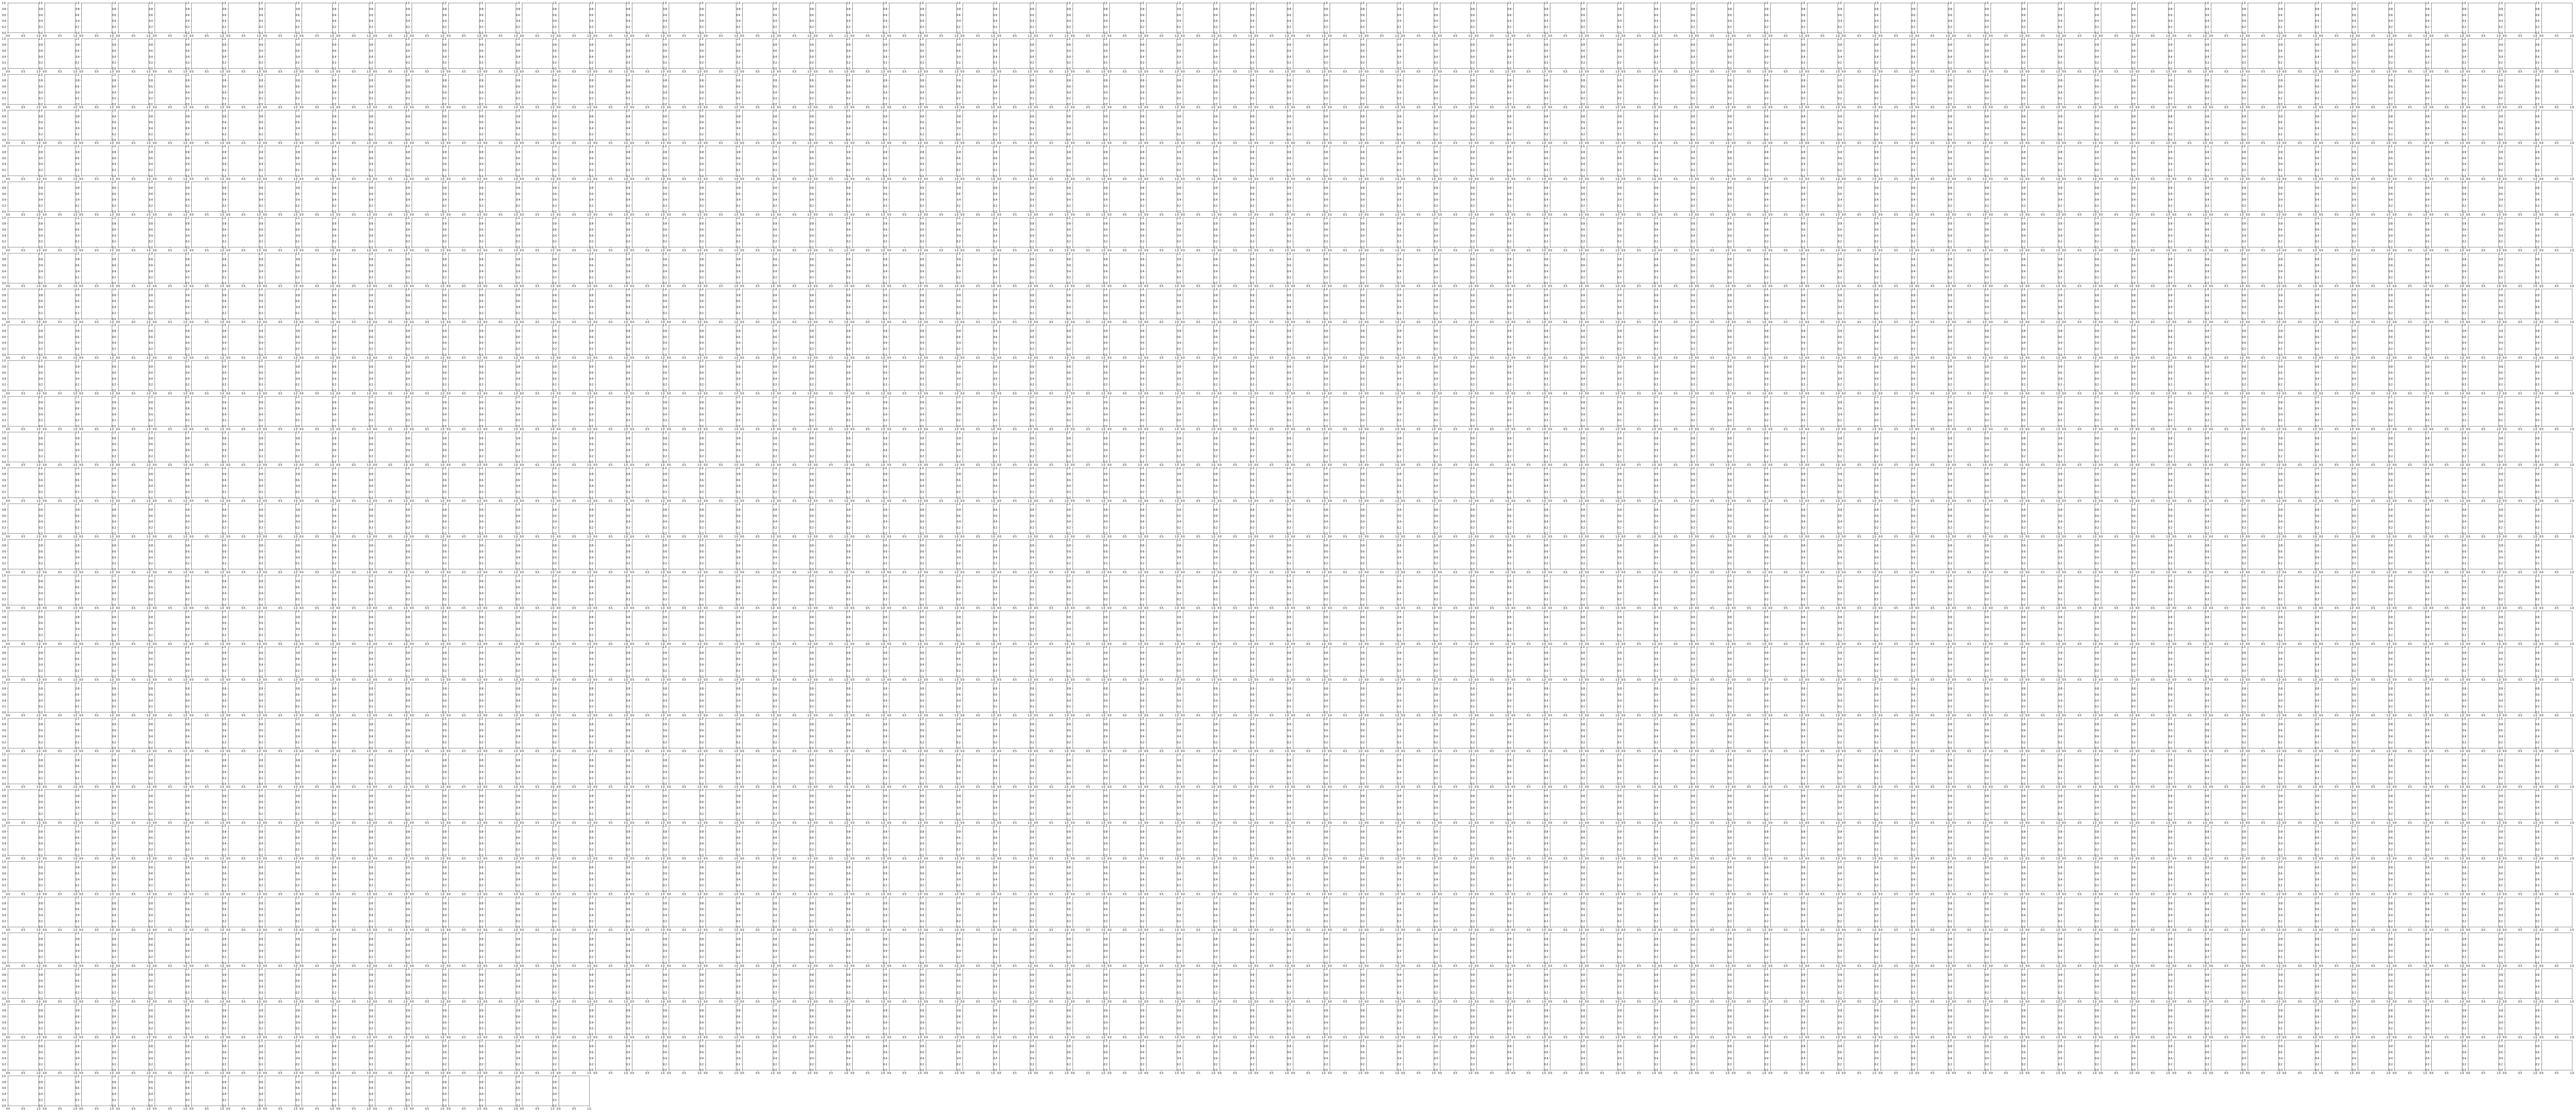

In [28]:
grid = sns.pairplot(audio_df)
grid.fig.suptitle('Distribution of Audio Features', y=1.04)
plt.show()

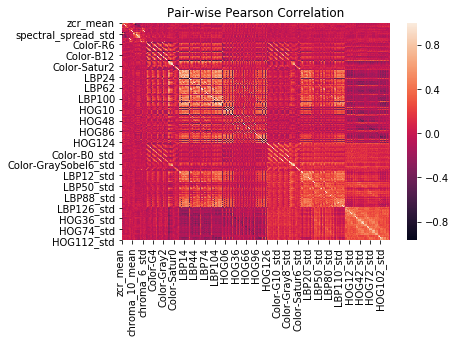

In [29]:
correlations = df.corr()
fig = sns.heatmap(correlations)
fig.set_title('Pair-wise Pearson Correlation')
plt.show()

In [8]:
df = df.set_index(['Title'], append=True)

In [9]:
binned = pd.DataFrame(index=df.index)

In [10]:
for col in df.columns:
    abin = pd.cut(x=df[col],
                  bins=4, 
                  labels=['__low','__mid_low','__mid_high', '__high'], 
                  retbins=False)
    onehot = pd.get_dummies(abin,prefix=col)
    binned = binned.join(onehot)

In [11]:
binned

,,zcr_mean___low,zcr_mean___mid_low,zcr_mean___mid_high,zcr_mean___high,energy_mean___low,energy_mean___mid_low,energy_mean___mid_high,energy_mean___high,energy_entropy_mean___low,energy_entropy_mean___mid_low,...,HOG127_std___mid_high,HOG127_std___high,m_std___low,m_std___mid_low,m_std___mid_high,m_std___high,s_std___low,s_std___mid_low,s_std___mid_high,s_std___high
,Title,,,,,,,,,,,,,,,,,,,,,
ae0f28579c171af7f96329028067f47d,_He_Doesn_t_Say_It_-_Leonidas_Farewells_Queen_Gorgo_-_Full_HD-id_7tH1FzD1YY8-specs_256x144_25-from_1-to_21.mp4,1,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
1912b4269870fab4e42977c9a6fa0e1d,_He_Doesn_t_Say_It_-_Leonidas_Farewells_Queen_Gorgo_-_Full_HD-id_7tH1FzD1YY8-specs_256x144_25-from_21-to_41.mp4,1,0,0,0,1,0,0,0,0,0,...,1,0,0,0,1,0,0,1,0,0
bf6632523e0215bd7b38fcc82c0a0eb9,_He_Doesn_t_Say_It_-_Leonidas_Farewells_Queen_Gorgo_-_Full_HD-id_7tH1FzD1YY8-specs_256x144_25-from_41-to_61.mp4,1,0,0,0,1,0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
39ab645473a39401775a17022cfa5d83,title_Spartans_Part_II_Astenios_Death-id_5okHkftNTqM-specs_192x144_25-from_55-to_75.mp4,0,1,0,0,0,1,0,0,0,0,...,1,0,0,1,0,0,0,1,0,0
408774c62bb613bf5b570881ac010d6c,title_Spartans_Part_II_Astenios_Death-id_5okHkftNTqM-specs_192x144_25-from_75-to_95.mp4,0,1,0,0,1,0,0,0,0,1,...,0,0,0,0,0,1,0,0,1,0
7e81ebdebbdc3e62f56fa038144d55b9,title_Jupiter_and_Beyond_the_Infinite_Part_I-id_Imbxqv_5TJU-specs_192x144_25-from_0-to_20.mp4,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
902f4266118f7028a8da3869c543e991,title_Jupiter_and_Beyond_the_Infinite_Part_I-id_Imbxqv_5TJU-specs_192x144_25-from_20-to_40.mp4,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
c179a3085b69b7eba59b6a7c8c4a33b2,title_Jupiter_and_Beyond_the_Infinite_Part_I-id_Imbxqv_5TJU-specs_192x144_25-from_40-to_60.mp4,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
6a7c86f79a7aacc8257e49d74ecfa37c,title_Jupiter_and_Beyond_the_Infinite_Part_I-id_Imbxqv_5TJU-specs_192x144_25-from_60-to_80.mp4,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [ ]:
frequent_itemsets = apriori(binned, min_support=0.95, use_colnames=True)

In [ ]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules.head()